Инвестирование имеет смысл, если мы ожидаем получить больше денег, чем внесли. Но прибыль это только одна сторона медали - риск также сопутствует процессу инвестирования. В данном проекте расчитывается коэффициент Шарпа, введенный нобелевским лауреатом по экономике, профессором Уильямом Шарпом. 

Коэффициент Шарпа — показатель эффективности инвестиционного портфеля (актива), который вычисляется как отношение средней премии за риск к среднему отклонению портфеля. Коэффициент Шарпа позволяет сравнивать возврат на капитал от двух инвестиций и вычислять возврат на единицу риска для этих двух инвестиций. 

Проведем расчет коэффициентов Шарпа для двух технологических гигантов - Facebook и Amazon. В качестве бенчмарка используем индекс S&P 500.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Устанавливаем настройки для графического отображения информации
plt.style.use('fivethirtyeight')
%matplotlib inline

# Считываем данные, предварительно подготовленные в виде DataFrame
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates=['Date'], index_col='Date').dropna()
benchmark_data = pd.read_csv('datasets/benchmark_data.csv', parse_dates=['Date'], index_col='Date').dropna() 

Проведем краткий анализ (EDA) наших данных

In [2]:
# Информация по акциям Facebook и Amazon
print('Stocks\n')
stock_data.info()
print(stock_data.head())
# Информация по бенчмарку S&P 500
print('\nBenchmarks\n')
benchmark_data.info()
print(benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-08  1922.03


Чтобы лучше понимать, с чем мы имеем дело, визуализируем динамику акций рассматриваемых компаний

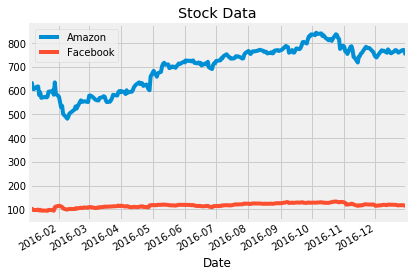

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


In [4]:
# визуализируем данные акций
stock_data.plot(title='Stock Data')
plt.show()
# Выведем статистические характеристики наших данных
stock_data.describe()

Аналогичные действия проведем с бенчмарком

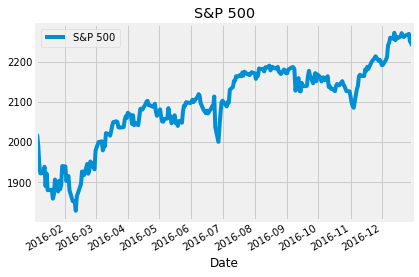

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [3]:
# визуализиаруем данные бенчмарка
benchmark_data.plot(title='S&P 500')
plt.show()
# Выведем статистические характеристики бенчмарка
benchmark_data.describe()

Коэффициент Шарпа использует разницу в доходе при вложении в определенные активы. Графики, которые мы построили до этого,
показывают историческую динамику цен на выбранные активы. Чтобы определить доход, необходимо высчитать изменение в процентах от одного дня к следующему.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


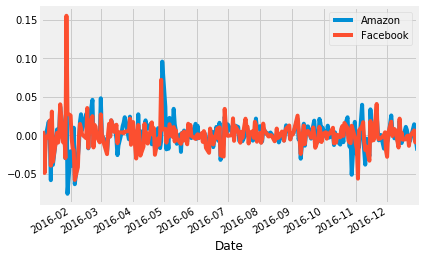

In [5]:
# Считаем доход для выбранных акций
stock_returns = stock_data.pct_change()

# Визуализируем полученные результаты
stock_returns.plot()

# Смотрим статистические характеристики
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

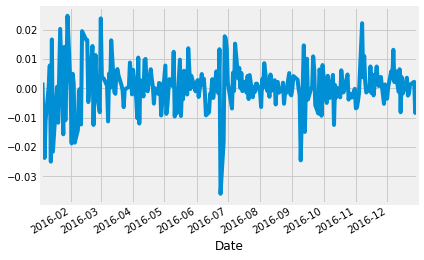

In [6]:
# Аналогично вычисляем доход для бенчмарка
sp_returns = benchmark_data['S&P 500'].pct_change()

# Визуализируем
sp_returns.plot()

# Выводим статистические характеристики
sp_returns.describe()

Вычисляем доход по выбранным акциям по сравнению с бенчмарком S&P 500

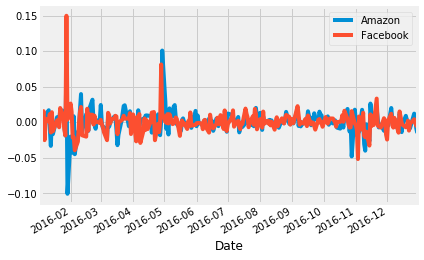

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


In [7]:
# Вычисляем разницу в доходе
excess_returns = stock_returns.sub(sp_returns, axis=0)

# Визуализируем
excess_returns.plot()
plt.show()

# Выводим статистические характеристики
excess_returns.describe()

Переходим непосредственно к вычислению коэффициента Шарпа

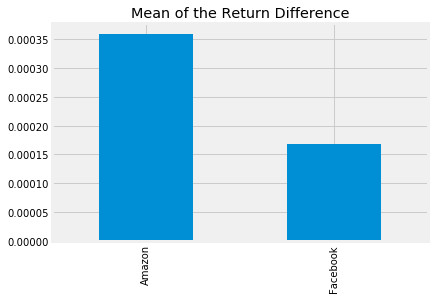

In [8]:
# Вычисляем средний ожидаемый доход от акций 
avg_excess_return = excess_returns.mean()

# Визуализируем данные
avg_excess_return.plot.bar(title='Mean of the Return Difference')
plt.show()

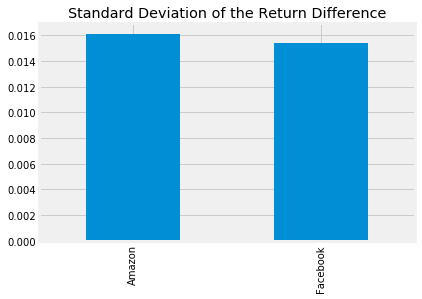

In [9]:
# Вычисляем среднее отклонение, как меру риска инвестиций
sd_excess_return = excess_returns.std()

# Визуализируем данные
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

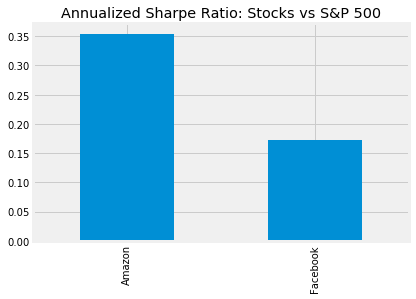

In [10]:
# Вычисляем дневной коэффициент Шарпа
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Вычисляем среднегодовой коэффициент Шарпа
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Визуализируем данные
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.show()

Итак, мы видим, что в 2016 году коэффициент Шарпа у Amazon был почти вдвое выше, чем у Facebook. Это означает, что вложения в акции Amazon принесли бы инвестору вдвое большую прибыль на единицу риска, и, очевидно, что Амазон в этом плане являлся более предпочтительным вложением, чем Фейсбук. 